# Exploratory data analysis (EDA)
This analysis contains 3 parts:
- Tweet time: analysis when the tweets where created and when the users where created.
- Small text: looking the most common words and ploting them. 
- Users names: a small analysis of the names of the users

## Extract and preprocess the data

In [19]:
!pip install matplotlib

     |████████████████████████████████| 10.3 MB 4.8 MB/s 
     |████████████████████████████████| 3.0 MB 3.9 MB/s 
     |████████████████████████████████| 1.2 MB 5.2 MB/s 
You should consider upgrading via the '/home/fabian/Documents/projects/fake_russian_tweets/.venv/bin/python -m pip install --upgrade pip' command.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt 

In [11]:
df_tweets = pd.read_csv("http://nodeassets.nbcnews.com/russian-twitter-trolls/tweets.csv", na_values="[]")
df_users = pd.read_csv("http://nodeassets.nbcnews.com/russian-twitter-trolls/users.csv", na_values="[]")

## Count Nan values

<AxesSubplot:>

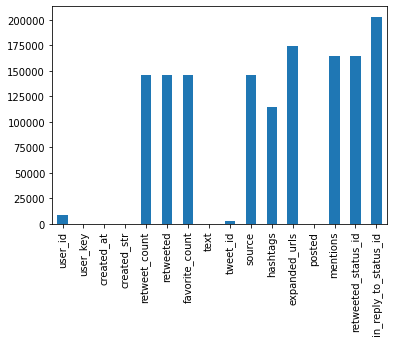

In [21]:
df_tweets.isna().sum().plot.bar()

<AxesSubplot:>

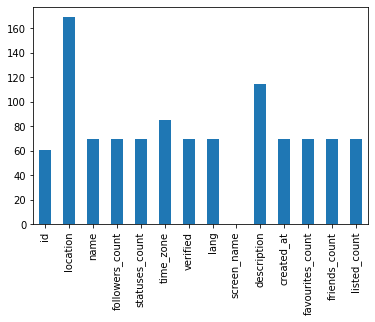

In [22]:
df_users.isna().sum().plot.bar()

## Amount of tweetes per user

<AxesSubplot:xlabel='user_key'>

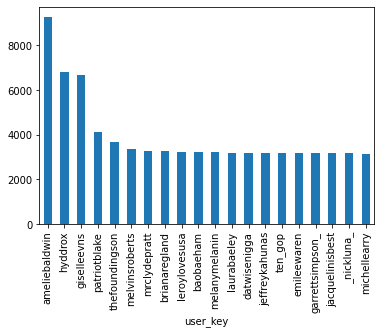

In [33]:
df_most_tweets = df_tweets.groupby("user_key")["user_key"].count()
df_most_tweets.nlargest(20).plot.bar()

### Type of text
See if there are non english words.

In [51]:
from string import printable

non_english = df_tweets["text"].apply(lambda x: "".join([i if  i not in printable else "" for i in str(x)]))

In [54]:
printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [58]:
list(non_english.unique())[:30]

['',
 '…',
 '💩',
 '😜😝',
 '🇺🇸…',
 '\x92\x85',
 '\xa0',
 '……',
 '🚨🚨🚨🚨',
 '“”\xa0…',
 '😏…',
 '😄❤️🇺🇸',
 '😬😬😬',
 '’',
 '’–',
 '😝',
 '😍😍😍',
 '…–',
 '😂😂😂',
 '😂',
 '💥💥💥…',
 'ü',
 '😒',
 'üü…',
 '🎂',
 '’’‘’',
 '‘’',
 '“……',
 '’’',
 '▶’…']

After checking the text in the tweets it will be needed to remove non english characters.

## Time analysis
When the tweets where create and when the users where created.

In [72]:
df_tweets["created_str"] = pd.to_datetime(df_tweets["created_str"])

<AxesSubplot:xlabel='created_str'>

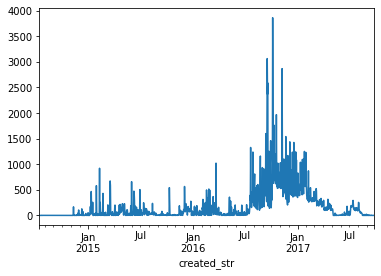

In [76]:
df_created_tweets = df_tweets.groupby("created_str")["text"].count()
df_created_tweets.resample("1D").sum().plot()

<AxesSubplot:xlabel='created_str'>

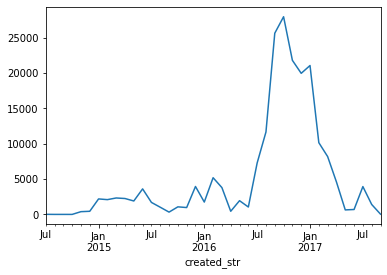

In [77]:
df_created_tweets.resample("1M").sum().plot()

For what we can see here the fake tweets where most created from july 2016 to may 2017, lets look closer that range

<AxesSubplot:xlabel='created_str'>

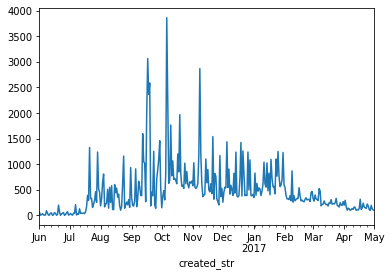

In [80]:
df_created_tweets["2016-06-01":"2017-05-01"].resample("1D").sum().plot()

## Text analysis
Wordcloud of the text of tweets

In [82]:
!pip install wordcloud

     |████████████████████████████████| 371 kB 142 kB/s 
You should consider upgrading via the '/home/fabian/Documents/projects/fake_russian_tweets/.venv/bin/python -m pip install --upgrade pip' command.


In [91]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

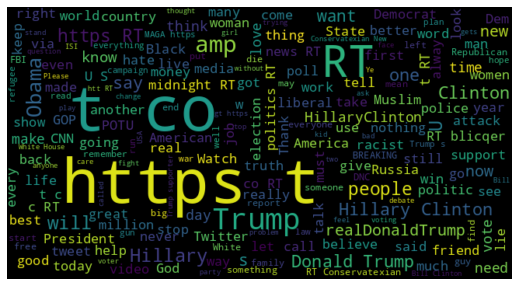

In [89]:
text = " ".join(review for review in df_tweets["text"].astype(str))


wordcloud = WordCloud( width=650, height=350, max_font_size=80, collocation_threshold=100).generate(text)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

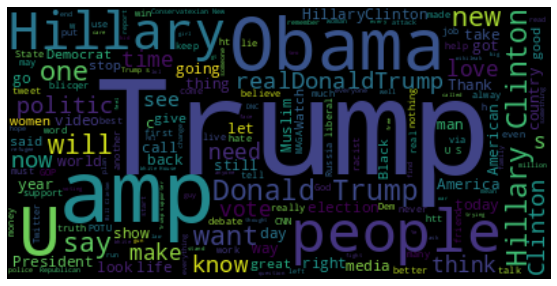

In [92]:
stopwords = set(STOPWORDS)
stopwords.update(["RT","https", "t", "co"])

wordcloud = WordCloud( stopwords= stopwords).generate(text)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Conclusion

Analyzed the tweets we can infer some ideas:
1. There is a lot of empty data in the many columns, to create a model they will be unused.
2. These tweets refer mostly to Trump/Obama/Hillary on a period when the US election was running, the election was in November 2016,so it could be to improve an image from a political candidate.
3. In order to use the texts of the data it will be needed to remove emojis and non-English letters.

To further analysis will be only used the text of the tweet, the other columns have mostly None values and we cant attach to a specific date period.
